In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data = pd.merge(ride,city,on="city",how="outer")

In [2]:
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
drivercount = data.groupby(['type','city']).driver_count.sum()
avgfare = data.groupby(['type','city']).fare.mean()
ridecount = data.groupby(['type','city']).ride_id.count()
new = pd.DataFrame({"Driver Count":drivercount,"Avg Fare":avgfare,"Ride Count":ridecount})

Text(2, 18, 'Size of Circle = Driver Count')

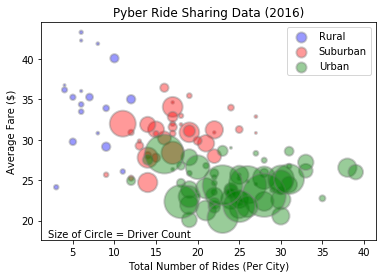

In [4]:

# Build the scatter plots for each city types
x = plt.scatter(ridecount["Rural"],avgfare["Rural"],drivercount,c="Blue",alpha=0.4,edgecolors="grey",linewidth=2)
y = plt.scatter(ridecount["Suburban"],avgfare["Suburban"],drivercount,c="Red",alpha=0.4,edgecolors="grey",linewidth=2)
z = plt.scatter(ridecount["Urban"],avgfare["Urban"],drivercount,c="Green",alpha=0.4,edgecolors="grey",linewidth=2)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend((x, y, z),('Rural','Suburban','Urban'),markerscale = .3,loc='upper right')

# Incorporate a text label regarding circle size
plt.text(2, 18, 'Size of Circle = Driver Count')
# Save Figure


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
          Total Fare
type                
Rural       6.811493
Suburban   30.463872
Urban      62.724635


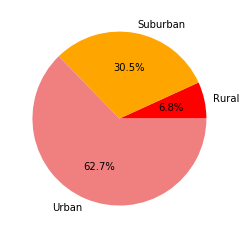

In [6]:
# Calculate Type Percents
fare = data.groupby(['type']).fare.sum()

new = pd.DataFrame({"Total Fare":fare/sum(fare)*100})
print(fare)
print(new)
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["red", "orange", "lightcoral"]
explode = (0, 0, 0)
plt.pie(new, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
# Save Figure
plt.savefig("../Images/CityTypeFares.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
          % of Rides by Type
type                        
Rural               5.263158
Suburban           26.315789
Urban              68.421053


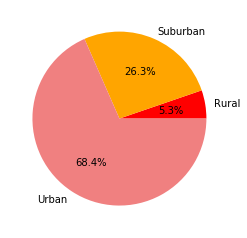

In [8]:
# Calculate Ride Percents
ride = data.groupby(['type']).ride_id.count()
new = pd.DataFrame({"% of Rides by Type":ride/sum(ride)*100})
print(ride)
print(new)
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["red", "orange", "lightcoral"]
explode = (0, 0, 0)
plt.pie(new, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
# Save Figure
plt.savefig("../Images/CityTypeRides.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [10]:
data["driver_count"].head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


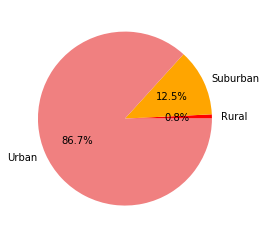

In [11]:
# Calculate Driver Percents
driver = data.groupby(['type']).driver_count.sum()
print(driver)
new = pd.DataFrame({"% of Drivers by Type":driver/data["driver_count"].sum()})
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["red", "orange", "lightcoral"]
explode = (0, 0, 0)
plt.pie(new, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")
# Save Figure
plt.savefig("../Images/CityTypeDrivers.png")

In [12]:
# Show Figure
plt.show()